The input array: [0.79, 0.13, 0.16, 0.64, 0.39, 0.2, 0.89, 0.53, 0.71, 0.42]
Array after the Bucket Sort operation is: [0.13, 0.16, 0.2, 0.39, 0.42, 0.53, 0.64, 0.71, 0.79, 0.89]
For 1 element, the time spent was 3.838539123535156e-05 secs
For 1 element, the time spent was 3.0994415283203125e-06 secs
For 10 element, the time spent was 5.9604644775390625e-05 secs
For 10 element, the time spent was 4.696846008300781e-05 secs
For 100 element, the time spent was 5.4836273193359375e-05 secs
For 100 element, the time spent was 0.00038552284240722656 secs
For 1000 element, the time spent was 4.839897155761719e-05 secs
For 1000 element, the time spent was 0.006072044372558594 secs
For 10000 element, the time spent was 5.984306335449219e-05 secs
For 10000 element, the time spent was 0.10113239288330078 secs
For 100000 element, the time spent was 4.696846008300781e-05 secs
For 100000 element, the time spent was 2.5681233406066895 secs


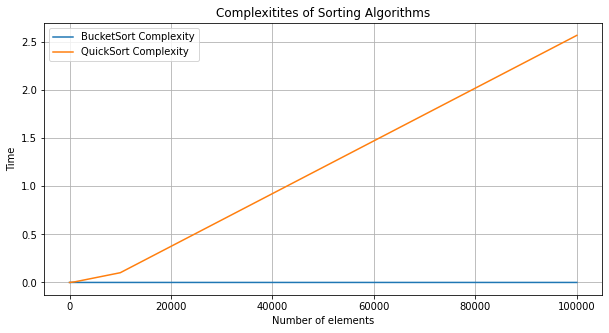

In [62]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# Insertion Sort

def insertionSort(A) :
    for j in range(1, len(A)) :
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key :
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A

# Bucket Sort 

def bucketSort(A) :
    B = []
    n = len(A)
    index_B = [[0]]*(n)
    for i in range(n) :
        index_B[i] = []
    for i in range(n) :
        index_B[math.floor(n*A[i]/10**len(str(A[i])))].append(A[i])
    for i in range(n) :
        sorted_array_B = insertionSort(index_B[i])
        B = B + sorted_array_B
    return B


A = [0.79,0.13,0.16,0.64,0.39,0.20,0.89,0.53,0.71,0.42]

print('The input array:',A)
print('Array after the Bucket Sort operation is:',bucketSort(A))

#QuickSort

def quickSort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)

def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i],A[j] = A[j],A[i]

    A[i+1],A[r] = A[r],A[i+1]
    return i+1

elementAb = []
elementAq = []
bsort_time = []
qsort_time = []
qsort_time_list = []
bsort_time_list = []

for i in range(0,6):
    Ab = np.random.randint(-1000, 1000, size=pow(10, i))
    Aq = np.random.randint(-1000, 1000, size=pow(10, i))

    bsort_start_time = time.time()
    b_sorted = bucketSort(A)
    bsort_time = time.time() - bsort_start_time
    print("For",len(Ab),"element, the time spent was" , + bsort_time, "secs")

    elementAb.append(len(Ab))

    bsort_time_list.append(bsort_time)

    qsort_start_time = time.time()
    q_sorted = quickSort(Aq, 0, len(Aq)-1)
    qsort_time = time.time() - qsort_start_time
    print("For",len(Aq),"element, the time spent was" , + qsort_time, "secs")

    elementAq.append(len(Aq))

    qsort_time_list.append(qsort_time)
    
fig=plt.figure(figsize= (10,5))
plt.title('Complexitites of Sorting Algorithms')
plt.xlabel('Number of elements')
plt.ylabel('Time')
plt.plot(elementAb, bsort_time_list, label ='BucketSort Complexity')
plt.plot(elementAq, qsort_time_list, label = 'QuickSort Complexity')
plt.grid()
plt.legend()
plt.show()

The input array: [329, 457, 657, 666, 839, 436, 720, 355]
Array after the Radix Sort operation is: [329, 355, 436, 457, 657, 666, 720, 839]
For 1 element, the time spent in RadixSort was 0.013033151626586914 secs
For 1 element, the time spent in QuickSort was 2.384185791015625e-06 secs
For 10 element, the time spent in RadixSort was 5.698204040527344e-05 secs
For 10 element, the time spent in QuickSort was 3.0994415283203125e-05 secs
For 100 element, the time spent in RadixSort was 0.0005908012390136719 secs
For 100 element, the time spent in QuickSort was 0.0003848075866699219 secs
For 1000 element, the time spent in RadixSort was 0.0042116641998291016 secs
For 1000 element, the time spent in QuickSort was 0.0053462982177734375 secs
For 10000 element, the time spent in RadixSort was 0.014268636703491211 secs
For 10000 element, the time spent in QuickSort was 0.08628726005554199 secs
For 100000 element, the time spent in RadixSort was 0.6873817443847656 secs
For 100000 element, the tim

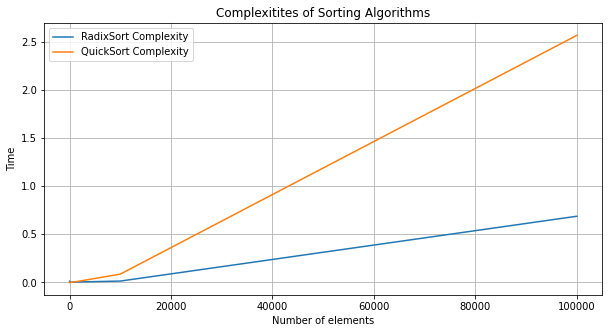

In [61]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Counting Sort

def countingSort(A, B, k, auxiliary_array_C):
    C = [0]*(k+1)
    
    for j in range(len(A)):
        C[auxiliary_array_C[j]] = C[auxiliary_array_C[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(A)-1,-1,-1):
        B[C[auxiliary_array_C[j]]-1] = A[j]
        C[auxiliary_array_C[j]] = C[auxiliary_array_C[j]] - 1
    return B

  
# Radix Sort

def radixSort(A):
    d = len(str(A[0]))
    for i in range(0,d):
        auxiliary_array_C = []
        for j in range(len(A)):
            auxiliary_array_C.append((A[j]//10**i) % 10)
        A = countingSort(A, [0]*len(A), max(auxiliary_array_C), auxiliary_array_C)
    return A

A = [329,457,657,666,839,436,720,355]

print('The input array:',A)
print('Array after the Radix Sort operation is:',radixSort(A))

#QuickSort

def quickSort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)

def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i],A[j] = A[j],A[i]

    A[i+1],A[r] = A[r],A[i+1]
    return i+1

elementAr = []
elementAq = []
r_sort_time = []
qsort_time = []
rsort_time_list = []
qsort_time_list = []


for i in range(0,6):

    Ar = np.random.randint(-1000, 1000, size=pow(10, i))
    Aq = np.random.randint(-1000, 1000, size=pow(10, i))

    
    r_start_time = time.time()
    r_sorted = radixSort(Ar)
    rsort_time = time.time() - r_start_time
    print("For",len(Ar),"element, the time spent in RadixSort was" , + rsort_time, "secs")

    elementAr.append(len(Ar))

    rsort_time_list.append(rsort_time)


    qsort_start_time = time.time()
    q_sorted = quickSort(Aq, 0, len(Aq)-1)
    qsort_time = time.time() - qsort_start_time
    print("For",len(Aq),"element, the time spent in QuickSort was" , + qsort_time, "secs")

    elementAq.append(len(Aq))
        
    qsort_time_list.append(qsort_time)

fig=plt.figure(figsize= (10,5))
plt.title('Complexitites of Sorting Algorithms')
plt.xlabel('Number of elements')
plt.ylabel('Time')
plt.plot(elementAr, rsort_time_list, label = "RadixSort Complexity")
plt.plot(elementAq, qsort_time_list, label = "QuickSort Complexity")
plt.grid()
plt.legend()
plt.show()